In [1]:
import time

from prob import VRPDataset
from solver import sweepHeuristic, cwHeuristic, googleOR
from utils import routesPlot, checkValid

In [2]:
# load data
data = VRPDataset(num_samples=10000)

In [3]:
def run(solver):
    cnt = 0
    for ins in data:
        cnt += 1
        # get info
        depot = ins["depot"].detach().numpy()
        loc = ins["loc"].detach().numpy()
        demand = ins["demand"].detach().numpy()
        # run solver
        prob = solver(depot, loc, demand)
        tick = time.time()
        routes, obj = prob.solve()
        tock = time.time()
        # print results
        print("Obj Val: {:.4f}".format(obj))
        print("Routes:")
        for r in routes:
            print("  ", "->".join(map(str, r)))
        print("Time elpased: {:.4f} sec".format(tock - tick))
        # check valid
        assert checkValid(routes, depot, loc, demand), "Infeasible solution."
        # vis
        routesPlot(routes, depot, loc)
        # stop
        if cnt >= 3:
            break
        print()

Obj Val: 11.4215
Routes:
   8->5->49->31->19->10
   13->22->43->40->6->44->21->48
   27->0->41->24->15->46
   38->23->35->28->26->25->12->30
   1->37->32->36->33->29->4
   14->18->11->47->17
   42->34->9->45
   2->3->16->7->20->39
Time elpased: 1.6364 sec


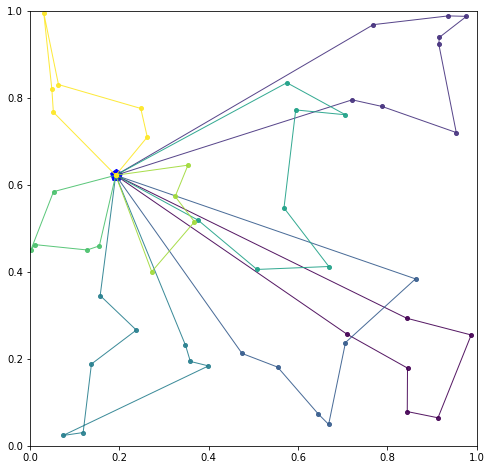


Obj Val: 10.1204
Routes:
   21->48->37->16->22->45->35->8->18
   14->32->30->9->4->44->29->7
   15->28->24->20->23->46->47->19->42->26->41->2->12
   34->38->13->5->33->11->40
   1->43->6->0->49->17
   39->36->10->27->25
   3->31
Time elpased: 1.7093 sec


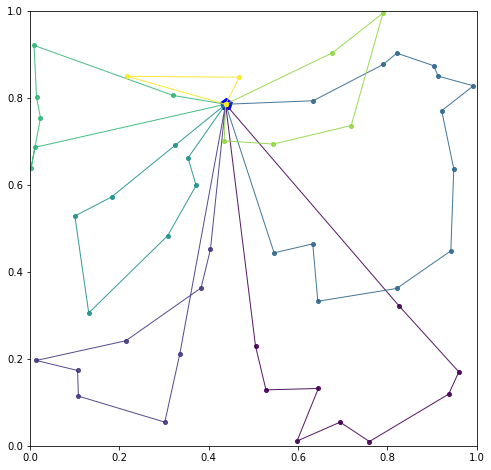


Obj Val: 11.4022
Routes:
   23->22->15->31->4->28->16
   42->43->33->8->38->13->47
   35->44->27->32->39->7->46->40->5->17
   30->3->25->21->49->20
   36->24->29->9->48->34
   12->26->6->19->41->1->10->2->14
   0->18->45->37->11
Time elpased: 1.6893 sec


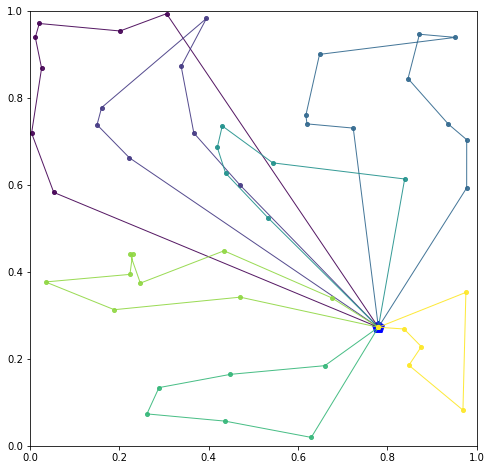

In [4]:
run(cwHeuristic)

Set parameter Username
Academic license - for non-commercial use only - expires 2021-12-31
Obj Val: 12.1322
Routes:
   39->20->16->7->3->2
   14->11->18->26->28->35->38->47->17
   23->30->12->25->27->42
   0->41->24->49->31
   34->37->15->5->8->1
   32->10->19->46->9
   36->43->22->13->29->33->45
   40->6->44->21->48->4
Time elpased: 0.1943 sec


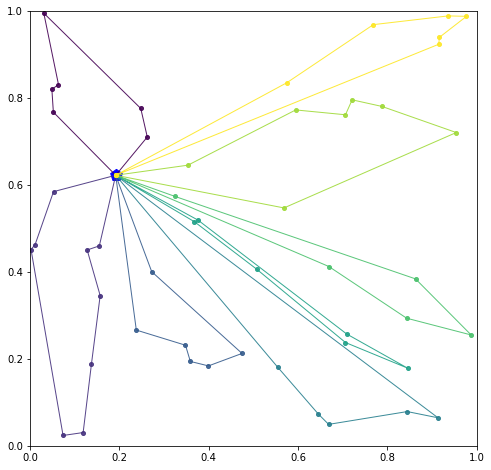


Obj Val: 10.2406
Routes:
   3->31->43->6->0->1
   17->49->33->11->40
   34->5->9->44->4->30->13
   38->14->32->7->29->48->21->25
   12->41->37->16->22->45->35->8->18->2
   27->26->42->19->47->46->23->20->24->28->10->15
   39->36
Time elpased: 0.1990 sec


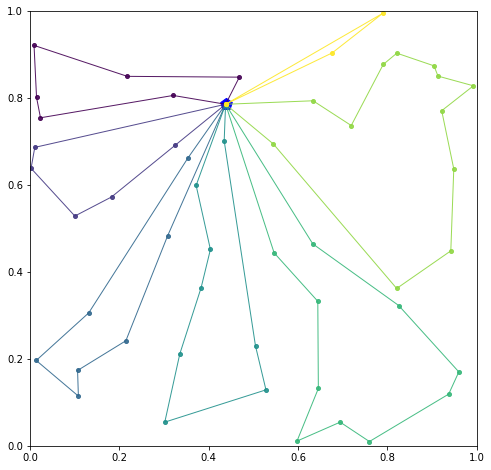


Obj Val: 12.3256
Routes:
   35->44->27->32->7->39->46->17->20
   5->40->8->16->33->21->49
   25->28->43->3->42->30
   38->4->31->15->13->47->14
   2->41->1->22->23->6->19->10->12
   48->26->9->29->24->34
   36->37->45->18->11->0
Time elpased: 0.1510 sec


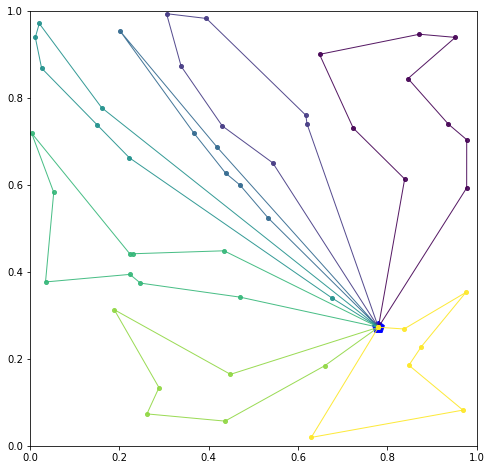

In [5]:
run(sweepHeuristic)

Obj Val: 11.0703
Routes:
   33->13->40->6->44->21->48->4
   27->0->41->24->15->37->1
   10->19->31->49->5->8
   39->20->16->7->3->2
   38->35->26->28->25->12->30->23
   36->32->46->43->22->29
   14->11->18->47->17
   45->9->34->42
Time elpased: 3.0098 sec


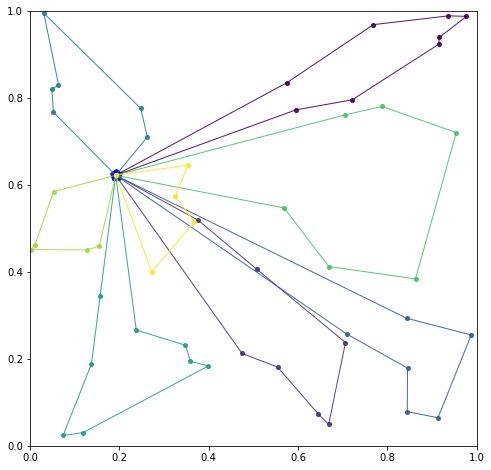


Obj Val: 10.0846
Routes:
   2->41->37->22->45->16->48->21->34
   10->19->42->8->35->18->26->12->27
   3->39->36->24->20->23->46->47->28->15
   25
   38->13->30->4->44->29->7->32->14
   40->17->6->43->31->1
   11->33->5->9->49->0
Time elpased: 3.0017 sec


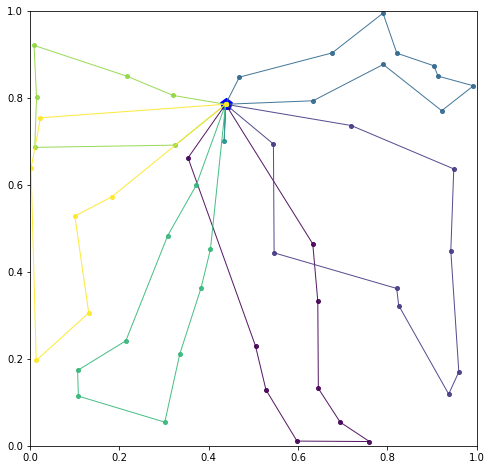


Obj Val: 11.8575
Routes:
   23->22->15->31->4->28->16
   49->3->42->30
   14->2->47->13->38->33->43->25
   17->5->40->21->8->46->39->7->32->20
   26->6->1->41->19->10->12
   36->24->29->9->48->34
   0->18->45->37->11->35->44->27
Time elpased: 3.0012 sec


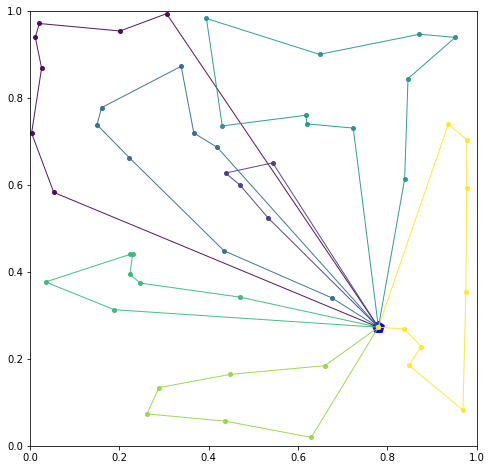

In [6]:
run(googleOR)